In [46]:
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [47]:
im = cv2.imread('c:/Users/nishant/Image Segmentation/pandas.jpg')

In [48]:
print(im.shape)
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)

(307, 512, 3)


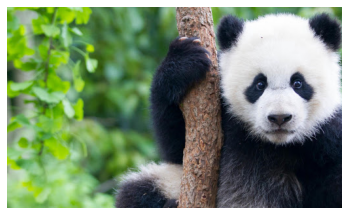

In [49]:
plt.imshow(im)
plt.axis(False)
plt.show()

In [50]:
all_pixels = im.reshape((-1,3))
print(all_pixels.shape)

(157184, 3)


In [51]:
dominant_colors = 5
km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(n_clusters=5)

In [52]:
centers = km.cluster_centers_

In [53]:
centers = np.array(centers,dtype='uint8')

In [54]:
centers

array([[226, 228, 230],
       [ 21,  28,  35],
       [149, 175, 136],
       [121, 180,  36],
       [ 81, 105,  72]], dtype=uint8)

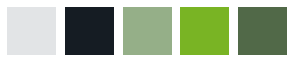

In [55]:
i = 1
colors = []
plt.figure(figsize = (5,2))
for each_col in centers:
    plt.subplot(1,5,i)
    i += 1
    
    colors.append(each_col)
    
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.axis(False)
    plt.imshow(a)
    
plt.show()

In [56]:
new_img = np.zeros((307*512,3),dtype='uint8')
print(new_img.shape)

(157184, 3)


In [57]:
colors

[array([226, 228, 230], dtype=uint8),
 array([21, 28, 35], dtype=uint8),
 array([149, 175, 136], dtype=uint8),
 array([121, 180,  36], dtype=uint8),
 array([ 81, 105,  72], dtype=uint8)]

In [58]:
km.labels_

array([2, 2, 2, ..., 1, 1, 1])

In [59]:
for ix in range(new_img.shape[0]):
    
    new_img[ix]  = colors[km.labels_[ix]]
    
new_img = new_img.reshape((im.shape))



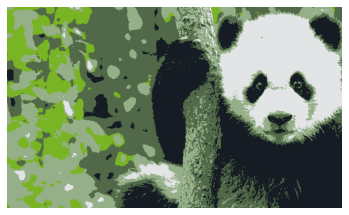

In [60]:
plt.imshow(new_img)
plt.axis(False)
plt.show()

In [73]:
dominant_colors =  [2,4,5,6,10,15,20]
def segment_image(dominant_colors,all_pixels,original_shape):
    i = 1
    
    for dom in dominant_colors:
        
        
        km = KMeans(n_clusters=dom)
        km.fit(all_pixels)
        centers = km.cluster_centers_
        centers = np.array(centers,dtype='uint8')
        colors = []
        for each_col in centers:
            colors.append(each_col)
        new_img = np.zeros((307*512,3),dtype='uint8')
        for ix in range(new_img.shape[0]):
            new_img[ix]  = colors[km.labels_[ix]]
    
        new_img = new_img.reshape((original_shape))
        plt.figure(figsize=(5,5))
        plt.imshow(new_img)
        plt.title(f'k = {dom}')
        plt.axis(False)
        plt.show()

In [65]:
original_shape = im.shape


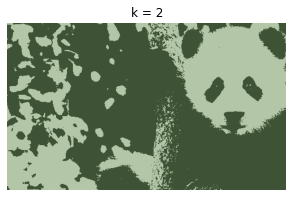

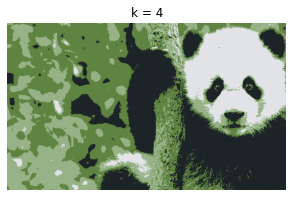

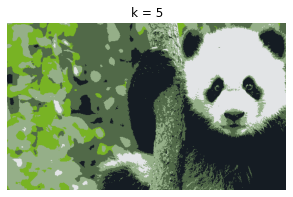

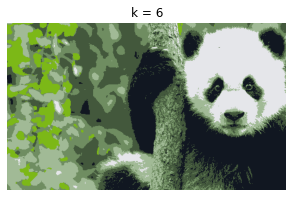

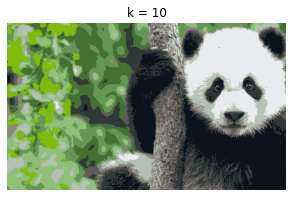

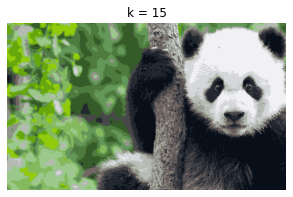

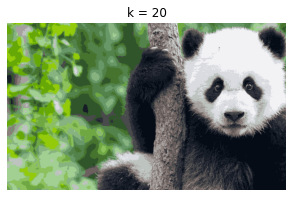

In [74]:
segment_image(dominant_colors,all_pixels,original_shape)